Useful :

to set param for sns use  :
    - sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})

about ticks :

    https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
    
    
    
kaggle courses :
    https://www.kaggle.com/learn/intermediate-machine-learning
    https://www.kaggle.com/code/alexisbcook/categorical-variables


# Import libs and load data

In [1]:
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from ipywidgets import HTML,Output,HBox

import missingno as msno

import random 

In [2]:
%matplotlib inline

In [3]:
ls data

2015-building-energy-benchmarking.csv
2016-building-energy-benchmarking.csv
socrata_metadata_2015-building-energy-benchmarking.json
socrata_metadata_2016-building-energy-benchmarking.json


HTML(value='\n<h3>Dropping empty rows and columns </h2></strong>\n    ')

HTML(value="\n<ul>\n   <li>dropped empty rows : <font color='red'>0% </font>\n   <li>dropped empty col :  <fon…

HTML(value=' \n<h3>Shape :</h3>\n<ul>\n   <li>3340 individuals\n   <li>47 variables : \n        <ul>\n        …

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


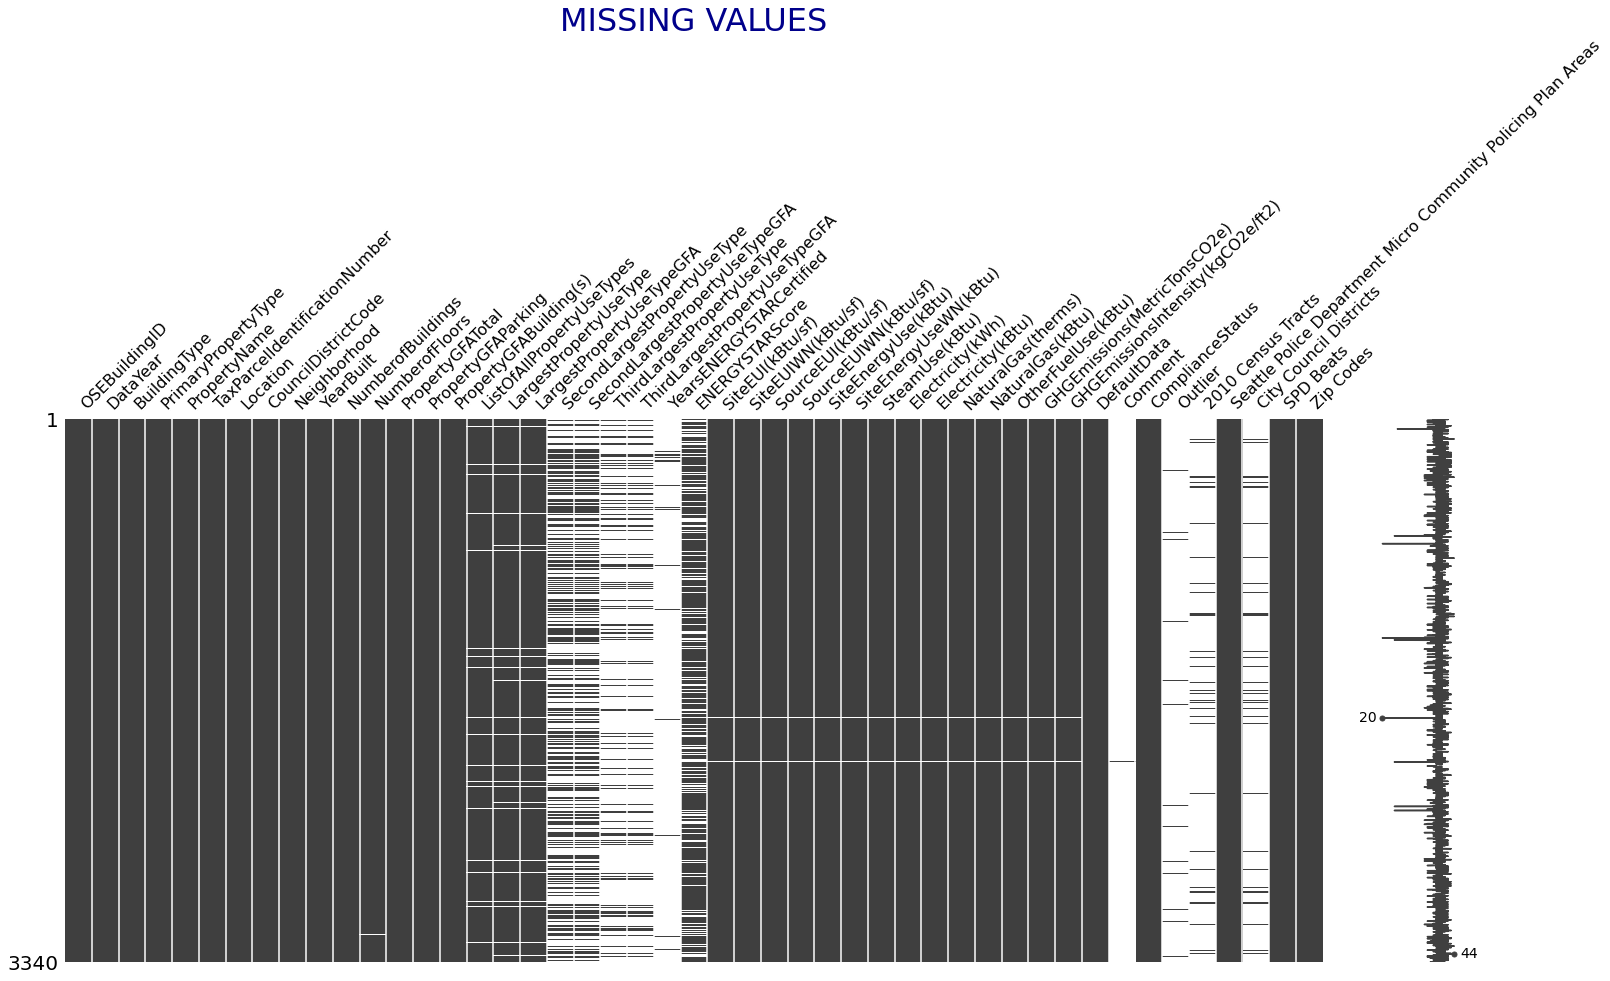

HTML(value='\n<h3>Dropping empty rows and columns </h2></strong>\n    ')

HTML(value="\n<ul>\n   <li>dropped empty rows : <font color='red'>0% </font>\n   <li>dropped empty col :  <fon…

HTML(value=' \n<h3>Shape :</h3>\n<ul>\n   <li>3376 individuals\n   <li>45 variables : \n        <ul>\n        …

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,21566554.0,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,NaN,2089.28,2.19


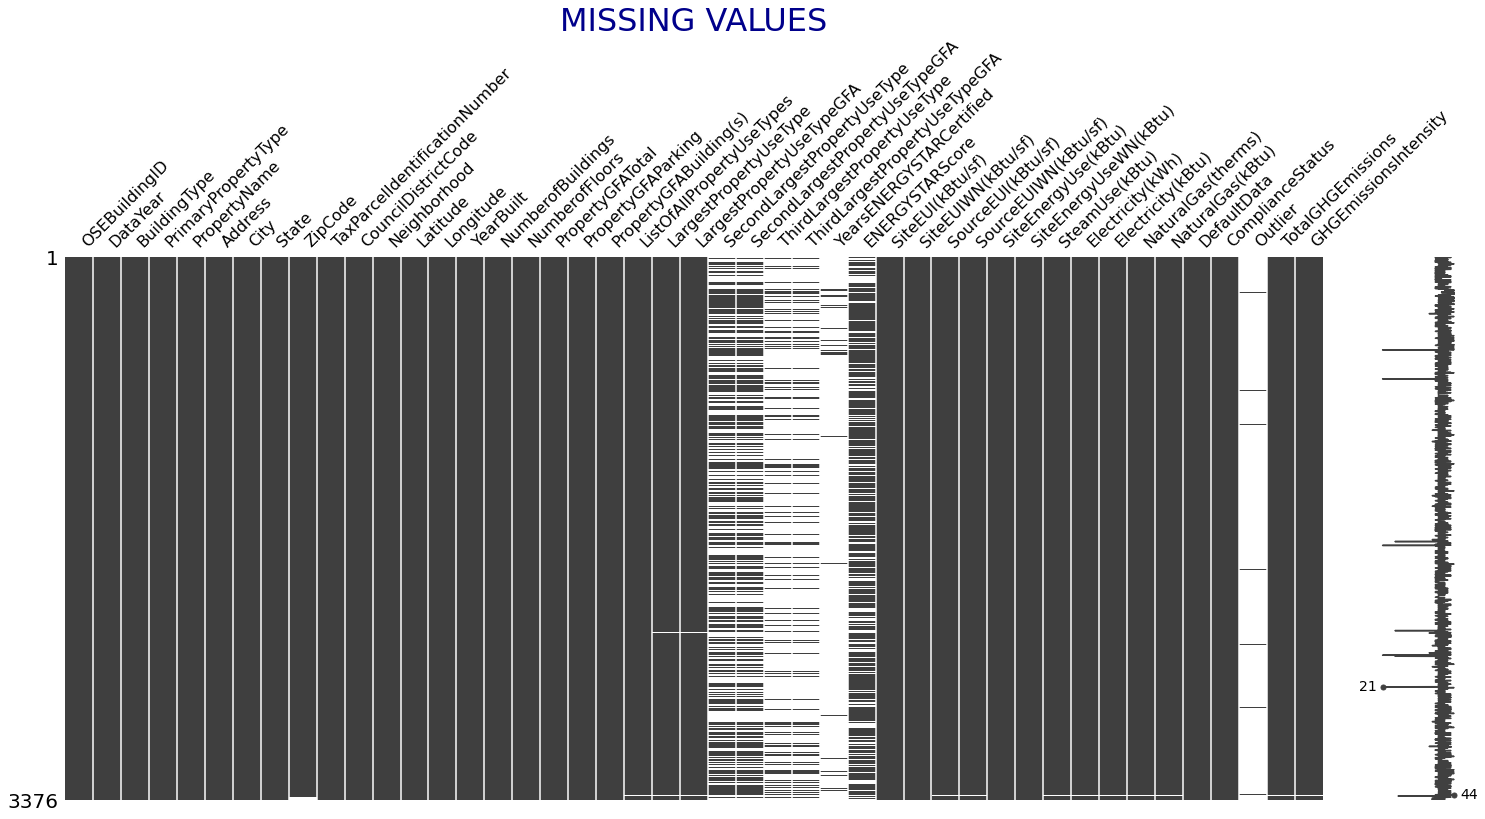

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,NaN,22.11,1.57


In [67]:
df1_raw = pd.read_csv("data/2015-building-energy-benchmarking.csv")
df2_raw = pd.read_csv("data/2016-building-energy-benchmarking.csv")

df1 = df1_raw.copy()
df2 = df2_raw.copy()

clean0(df1)
clean0(df2)

In [263]:
import json 

with open("data/socrata_metadata_2015-building-energy-benchmarking.json", 'r') as f:
    data = json.load(f)

#print(json.dumps(data, indent = 4, sort_keys=True))
#data["columns"]

de_2015 = pd.DataFrame.from_records(data["columns"])
de_2015.name.unique()

array(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultD

In [272]:
de_2015[["fieldName","description",]][de_2015.fieldName.str.contains("site")]

,fieldName,description
24,siteeui_kbtu_sf,"Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot."
25,siteeuiwn_kbtu_sf,\t\nWeather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
28,siteenergyuse_kbtu,\t\nThe annual amount of energy consumed by the property from all sources of energy.
29,siteenergyusewn_kbtu,NaN


## Custom functions

In [8]:
def cleanCol(df) :
    
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.replace(' ', '_')
    return df


In [9]:
def diffCol(df1,df2,l="left",r="right") :
    
    print(f"""
   |____ Columns in {l} not in {r} : 
   
{sorted(set(df1.columns) - set(df2.columns))}

   |____ Columns in {r} not in {l} : 
   
{sorted(set(df2.columns) - set(df1.columns))}
    """)


In [10]:
def splitDictCol(df,colName) :
    
    t1 = df[colName].map(eval).apply(pd.Series)
    print(f"   |____ Splitting {colName} ... ")
    
    df.drop(columns=colName,inplace=True)
    df = pd.concat([df,t1],axis=1)
    print(f"""      |____ Created {len(t1.columns)} new columns : 
    
{t1.columns.to_list()}

""")
    
    return df

In [11]:
def compareSeries(series_L,series_M,series_R=None) :
    
    output_L = Output()
    output_M = Output()
    output_R = Output()

    for out,ser in zip([output_L,output_M,output_R],[series_L,series_M,series_R]) :

        if ser is not None :
            
            with out :
                display(f"{ser.name}")
                display(ser.value_counts().head(10))
                display(ser.describe())

    hbox = HBox([output_L,output_M,output_R])
    
    display(hbox)
    

In [25]:
def toNumeric(df,colName,max_lostRate=0) :
    
    """Method that converts in place a column into numeric if it is not a datetime or timedelta"""
    
    series = df[colName]

    if series.dtype == float or series.dtype == int :
        
        print(f"Column {colName} is already numeric ")
        return -1
    
    if series.dtype == np.datetime64 or series.dtype == np.timedelta64 :
        
        print(f"Column {colName} is a date or timedelta ")
        return -2

    
    #convert to num
    series_num = pd.to_numeric(series,errors="coerce")

    lost = series_num.isna().sum() - series.isna().sum()
    lost_rate = lost/len(series)

    if lost_rate <= max_lostRate :
        
        print(f"Converted column {colName} to numeric : lost info = {lost_rate}% ({lost} rows)")
        df[colName] = series_num
        return 0

    else :
        
        print(f"DID NOT converte column {colName} to numeric : lost info = {lost_rate}% ({lost} rows) > threshold ({max_lostRate})")
        return 1

In [64]:
def clean0(df) :
    
    nb_dup = df.duplicated().sum()
    dupRate = nb_dup/len(df)
    (nb_rowsBefore,nb_colsBefore) = df.shape
    
    df_notNum = df.select_dtypes(exclude=['float','int','datetime64[ns]'])
    nb_cat = len(df_notNum.columns)
    
    df_num = df.select_dtypes(['float','int'])
    nb_num = len(df_num.columns)
    
    
    ###################################################################################

    display(HTML(f"""
<h3>Dropping empty rows and columns </h2></strong>
    """))

    ## After
    df.dropna(how='all',inplace=True)
    df.dropna(how='all',inplace=True,axis=1)
    (nb_rowsAfter,nb_colsAfter) = df.shape
    
    display(HTML(f"""
<ul>
   <li>dropped empty rows : <font color='red'>{100*(nb_rowsBefore-nb_rowsAfter)/nb_rowsBefore:.0f}% </font>
   <li>dropped empty col :  <font color='red'>{100*(nb_colsBefore-nb_colsAfter)/nb_colsBefore:.0f}%</font>
   <li>Number full duplicated rows : {nb_dup} - {dupRate:.2f}% 
    """))

    ###################################################################################

    display(HTML(f""" 
<h3>Shape :</h3>
<ul>
   <li>{nb_rowsAfter} individuals
   <li>{nb_colsAfter} variables : 
        <ul>
             <li>{nb_num} numeric </li>
             <li> {nb_cat} categorial</li> 
        </ul>
</ul>
<h3> Sample </h3>:
    """))
    display(df.head(3))

    msno.matrix(df)
    
    plt.title("MISSING VALUES",
              fontdict={'color':  'darkblue',
                         'weight': 'normal',
                         'size': 32,
                         }
             )
    plt.show()
    
    return df

## merging data

<div class ="alert alert-bloc alert-danger">Columns have changed over time.  The folowing ransformations are applied in process A : <div>
    
- Renaming columed in df1 : </b>
    
<table>
    <th style="background:black ; color:white">in df1</th>
    <th style="background:black ; color:white">in df2</th>
    <th style="background:black ; color:white">in df3 (target)</th> 
    <tbody>
        <tr>
            <td>Comment</td><td>Comments</td><td>Comments</td> 
        </tr>
        <tr>
            <td>GHGEmissionsIntensity(kgCO2e/ft2)</td><td>GHGEmissionsIntensity</td><td>GHGEmissionsIntensity<td>
    </tr>
    </table>
    
    
- Dropping lost data over time (dropped from df1):
    
        '2010 Census Tracts','City Council Districts'
    

- Changing of format (splitting):
    
<table>
    <th style="background:black ; color:white">in df1</th>
    <th style="background:black ; color:white">in df2</th>
    <th style="background:black ; color:white">in df3 (target)</th> 
    <tbody>
        <tr>
            <td>Location (nested dict)</td><td>City, Latitude, Longitude, State, ZipCode, Address</td><td>df2</td> 
        </tr>
        <tr>
            <td>{'latitude': '47.52593209', 'longitude': '-122.3308402', 'human_address': '{"address": "309 S CLOVERDALE ST", "city": "SEATTLE", "state": "WA", "zip": "98108"}'}</td>
        </tr>
        
</table>



### Cleanning A : Realligning data

#### Starting process A

In [14]:
print("|_ Cleaning column names")
df1 = cleanCol(df1)
df2 = cleanCol(df2)

print("""____________________________________________________
|_ Diffs betewwen df1(2015) and df2(2016) """)
diffCol(df1,df2,"2015","2016")

#renaming 1
print("|_ Renaming col in df1 (1)")
df1.rename({"Comment":"Comments",
            'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'} 
           ,axis="columns",inplace=True)

#droping
print("|_ Dropping col in df1")
df1.drop(columns=['2010_Census_Tracts','City_Council_Districts'],inplace=True)

#splitting Location in df1
print("|_ Splitting Location in df1")
df11 = splitDictCol(df1,"Location")
df12 = splitDictCol(df11,"human_address")

|_ Cleaning column names
____________________________________________________
|_ Diffs betewwen df1(2015) and df2(2016) 

   |____ Columns in 2015 not in 2016 : 
   
['2010_Census_Tracts', 'City_Council_Districts', 'Comment', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Location', 'OtherFuelUse(kBtu)', 'SPD_Beats', 'Seattle_Police_Department_Micro_Community_Policing_Plan_Areas', 'Zip_Codes']

   |____ Columns in 2016 not in 2015 : 
   
['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude', 'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode']
    
|_ Renaming col in df1 (1)
|_ Dropping col in df1
|_ Splitting Location in df1
   |____ Splitting Location ... 
      |____ Created 3 new columns : 
    
['latitude', 'longitude', 'human_address']


   |____ Splitting human_address ... 
      |____ Created 4 new columns : 
    
['address', 'city', 'state', 'zip']




#### Newly created columns in df1 (2015) requires :
- renaming :

<table>
    <th>in df12</th><th>in df2</th><th>in df3 (target)</th> 
    <tbody>
        <tr>
            <td>latitude</td><td>Latitude</td><td>Latitude</td>
        </tr>
        <tr>
            <td>longitude</td><td>Longitude</td><td>Longitude</td>
        </tr>
        <tr>
            <td>city</td><td>City</td><td>City</td>
        </tr>
        <tr>
            <td>state</td><td>State</td><td>State</td>
        </tr>
        <tr>
            <td>address</td><td>Address</td><td>Address</td>
        </tr>
        <tr>
            <td>GHGEmissions(MetricTonsCO2e)</td><td>TotalGHGEmissions</td><td>TotalGHGEmissions</td>
        </tr>
</table>

- choosing in df12 betweeb zip or Zip_Codes VS "ZipCode" in df2
        after verification "zip" is conserved and renamed "ZipCode",
          

In [15]:
#renaming 2
print("|_ Renaming col in df1 (2)")

for colName in ["latitude","longitude",'city', 'state','address'] :
    df12.rename({colName:colName.capitalize()},axis="columns",inplace=True)

print("""____________________________________________________
|_ Diffs betewwen df1(2015) and df2(2016) (2)""")
diffCol(df12,df2,"2015","2016")

|_ Renaming col in df1 (2)
____________________________________________________
|_ Diffs betewwen df1(2015) and df2(2016) (2)

   |____ Columns in 2015 not in 2016 : 
   
['GHGEmissions(MetricTonsCO2e)', 'OtherFuelUse(kBtu)', 'SPD_Beats', 'Seattle_Police_Department_Micro_Community_Policing_Plan_Areas', 'Zip_Codes', 'zip']

   |____ Columns in 2016 not in 2015 : 
   
['TotalGHGEmissions', 'ZipCode']
    


##### chosing zip or Zip_Codes
<div class="alert alert-block alert-warning">df12[zip] seems more legit compared to df2[ZipCode], a quick look at google confirms that Seattle's zipcodes start with 9

In [16]:
df12["zip"] = df12["zip"].astype(int)

#compare 3 columns

series_L = df12["Zip_Codes"]
series_M = df12["zip"]
series_R = df2["ZipCode"]


compareSeries(series_L,series_M,series_R)

##### Verifying GHGEmissions(MetricTonsCO2e) corresponds to TotalGHGEmissions
<div class="alert alert-block alert-success">df12's 'GHGEmissions(MetricTonsCO2e)' and df2's 'TotalGHGEmissions' might refer to the same metric

In [17]:
compareSeries(df12['GHGEmissions(MetricTonsCO2e)'],df2['TotalGHGEmissions'])

####  end of process A


<div class = "alert alert-warning"> 
    - dropping unmatched columns from df12 : 'OtherFuelUse(kBtu)', 'SPD_Beats', 'Seattle_Police_Department_Micro_Community_Policing_Plan_Areas'
    
    Those dropped values might be reintegrated and missing values extrapolated in next version 
</div>
      

In [18]:
#dropping Zip_Codes
print("|_ Dropping Zip_Codes from df1 and renaming zip : ZipCode")

df12.drop(columns=["Zip_Codes"],inplace=True)

df12.rename({"zip":"ZipCode",
            'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions'},
            axis="columns",inplace=True)

print("""____________________________________________________
|_ Diffs betewwen df1(2015) and df2(2016) (§)""")
diffCol(df12,df2,"2015","2016")

#dropping unmatched col in df12
print("|_ Dropping unöatched col from df1 (2015)")

df12.drop(columns=['OtherFuelUse(kBtu)', 'SPD_Beats', 'Seattle_Police_Department_Micro_Community_Policing_Plan_Areas'],inplace=True)
diffCol(df12,df2)

|_ Dropping Zip_Codes from df1 and renaming zip : ZipCode
____________________________________________________
|_ Diffs betewwen df1(2015) and df2(2016) (§)

   |____ Columns in 2015 not in 2016 : 
   
['OtherFuelUse(kBtu)', 'SPD_Beats', 'Seattle_Police_Department_Micro_Community_Policing_Plan_Areas']

   |____ Columns in 2016 not in 2015 : 
   
[]
    
|_ Dropping unöatched col from df1 (2015)

   |____ Columns in left not in right : 
   
[]

   |____ Columns in right not in left : 
   
[]
    


The 2 tables now can be merged

### Concatenation and mergure

In [293]:
df3_raw = pd.concat([df12,df2],ignore_index=True)
#df3.reset_index()
display(f"Shape after raw concatenation: {df3_raw.shape}")
display(df3_raw.sample(5))

'Shape after raw concatenation: (6716, 46)'

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
2407,25452,2015,NonResidential,Mixed Use Property,CHANDLERS COVE,4088803045,3,LAKE UNION,1988,1.0,...,No,NaN,Compliant,NaN,47.62782862,-122.33316,901 FAIRVIEW AVE N,SEATTLE,WA,98109.0
3195,44267,2015,Multifamily LR (1-4),Low-Rise Multifamily,SANTOS PLACE APT,225049066,4,NORTHEAST,1947,1.0,...,No,NaN,Compliant,NaN,47.67936509,-122.26185202,6940 62ND AVE NE,SEATTLE,WA,98115.0
3893,748,2016,NonResidential,Small- and Mid-Sized Office,Pier 70,7666202292,7,DOWNTOWN,1902,1.0,...,False,NaN,Compliant,NaN,47.61472,-122.35566,2801 Alaskan Way,Seattle,WA,98121.0
3443,169,2016,SPS-District K-12,K-12 School,Franklin High,5700000455,2,SOUTHEAST,1990,1.0,...,True,NaN,Error - Correct Default Data,NaN,47.57589,-122.29365,3013 S. Mt. Baker Blvd.,Seattle,WA,98144.0
4543,21236,2016,NonResidential,Retail Store,PETSMART 0375 (ID21236),1926049423,5,NORTHWEST,1998,1.0,...,False,NaN,Compliant,NaN,47.72337,-122.34373,13000 AURORA AVE N,Seattle,WA,98133.0


The scope of work is non residential usages so we will filter the data to exclude residential usages keeping mixed usage though

/home/zak/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


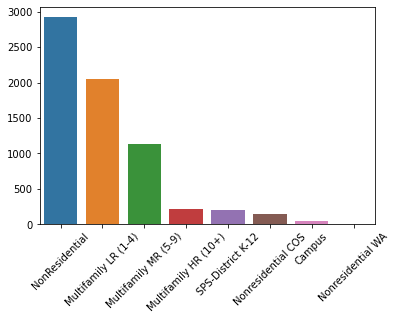

NonResidential          2921
Multifamily LR (1-4)    2047
Multifamily MR (5-9)    1134
Multifamily HR (10+)     217
SPS-District K-12        197
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [294]:
df = df3_raw.BuildingType.value_counts()

fig,ax = plt.subplots()

sns.barplot(df.index,df.values, ax= ax)

plt.xticks(rotation=45)

plt.show()

display(df)

In [302]:
df3 = df3_raw[df3_raw.BuildingType.isin(["NonResidential","SPS-District K-12","Nonresidential COS","Campus","Nonresidential WA"])]
display(f"Shape after raw concatenation: {df3.shape}")

'Shape after raw concatenation: (3318, 46)'

#### Converting columns to numeric 

In [303]:
for colName in ["Latitude","Longitude","TaxParcelIdentificationNumber"] :
    toNumeric(df3,colName,1)

Converted column Latitude to numeric : lost info = 0.0% (0 rows)
Converted column Longitude to numeric : lost info = 0.0% (0 rows)
Converted column TaxParcelIdentificationNumber to numeric : lost info = 0.0012055455093429777% (4 rows)


/tmp/ipykernel_739/1739599122.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colName] = series_num


In [304]:
df3.select_dtypes(exclude=[float,int])

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,Comments,ComplianceStatus,Outlier,Address,City,State
0,NonResidential,Hotel,MAYFLOWER PARK HOTEL,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,No,NaN,Compliant,NaN,405 OLIVE WAY,SEATTLE,WA
1,NonResidential,Hotel,PARAMOUNT HOTEL,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,No,NaN,Compliant,NaN,724 PINE ST,SEATTLE,WA
2,NonResidential,Hotel,WESTIN HOTEL,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,Yes,NaN,Compliant,NaN,1900 5TH AVE,SEATTLE,WA
3,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,No,NaN,Compliant,High Outlier,620 STEWART ST,SEATTLE,WA
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,No,NaN,Compliant,NaN,401 LENORA ST,SEATTLE,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,Nonresidential COS,Office,Horticulture building,GREATER DUWAMISH,Office,Office,NaN,NaN,NaN,True,NaN,Error - Correct Default Data,NaN,1600 S Dakota St,Seattle,WA
6712,Nonresidential COS,Other,International district/Chinatown CC,DOWNTOWN,Other - Recreation,Other - Recreation,NaN,NaN,NaN,False,NaN,Compliant,NaN,719 8th Ave S,Seattle,WA
6713,Nonresidential COS,Other,Queen Anne Pool,MAGNOLIA / QUEEN ANNE,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,NaN,False,NaN,Compliant,NaN,1920 1st Ave W,Seattle,WA
6714,Nonresidential COS,Mixed Use Property,South Park Community Center,GREATER DUWAMISH,"Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,NaN,False,NaN,Compliant,NaN,8319 8th Ave S,Seattle,WA


#### Dropping duplicated ids

<div class="alert alert-block alert-danger"> Merging the two tables shows that half the ids have been duplicated.
As there are no more than 2 duplicates per duplicated ids, it looks like some buildings have been assessed twice, which seems confirmed when verifying the DataYear column of a sample. 
    

In [305]:
print(f"""Nb of duplicated ids :

    - in df1 : {df12.OSEBuildingID.duplicated().sum()}, {100*df1.OSEBuildingID.duplicated().sum()/len(df1.OSEBuildingID):.2f}%
    - in df2 : {df2.OSEBuildingID.duplicated().sum()}, {100*df2.OSEBuildingID.duplicated().sum()/len(df2.OSEBuildingID):.2f}%
    - in df3 : {df3.OSEBuildingID.duplicated().sum()}, {100*df3.OSEBuildingID.duplicated().sum()/len(df3.OSEBuildingID):.2f}%
""")

Nb of duplicated ids :

    - in df1 : 0, 0.00%
    - in df2 : 0, 0.00%
    - in df3 : 1620, 48.82%



   
    
    
<div font size=14> VERIFIER SI LES FILLON, LES CHIRAC , LES SARKO, LES JUPE, LES BALADURE OU LES LEPEN ne travaillent pas a Seattle ... CA SENT ENCORE LE REND L ARGENT ET LES BUILDING FICTIFS  

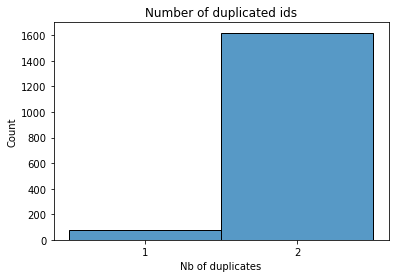

In [306]:
ident = "OSEBuildingID"
df = df3

dup_list = df[df[ident].duplicated()][ident].to_list()
dup_df = df[df[ident].isin(dup_list)].sort_values(ident)

# verify nb of duplicates per id 
nb_dup_per_id = df[ident].value_counts().sort_values(ascending=False)

fig,ax = plt.subplots()

ax.set_title("Number of duplicated ids")


sns.histplot(nb_dup_per_id,
             #bins=nb_dup_per_id.nunique(),
             discrete=True,
             ax = ax
            )

ax.set_xticks(range(1,nb_dup_per_id.nunique()+1))
ax.set_xlabel("Nb of duplicates")


plt.show()

In [307]:
#visual check some samples 
sample_size = 3

sample = dup_df[dup_df[ident].isin(random.choices(dup_list, k=sample_size))]
sample

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
74,111,2015,Nonresidential COS,Other,MERCER ARENA - SEATTLE CENTER,1.988201e+09,7,MAGNOLIA / QUEEN ANNE,1928,1.0,...,No,NaN,Compliant,NaN,47.623881,-122.349970,301 MERCER ST,SEATTLE,WA,98109.0
3414,111,2016,Nonresidential COS,Other,Mercer Arena,1.988201e+09,7,MAGNOLIA / QUEEN ANNE,1928,1.0,...,False,NaN,Compliant,NaN,47.623950,-122.350770,363 Mercer St.,Seattle,WA,98109.0
4029,19596,2016,NonResidential,Worship Facility,BALLARD CHURCH (ID19596),4.610024e+08,6,BALLARD,1914,1.0,...,False,NaN,Compliant,NaN,47.681640,-122.375300,1460 NW 73RD ST,Seattle,WA,98117.0
693,19596,2015,NonResidential,Worship Facility,BALLARD FREE METHODIST CHURCH,4.610024e+08,6,BALLARD,1914,1.0,...,Yes,NaN,Compliant,NaN,47.681563,-122.374939,1460 NW 73RD ST,SEATTLE,WA,98117.0
4072,19747,2016,NonResidential,Small- and Mid-Sized Office,First and Cedar Building,6.530004e+08,7,DOWNTOWN,1974,1.0,...,False,NaN,Compliant,NaN,47.615800,-122.351260,2701 1st Ave,Seattle,WA,98121.0
739,19747,2015,NonResidential,Small- and Mid-Sized Office,FIRST & CEDAR BUILDING,6.530004e+08,7,DOWNTOWN,1974,1.0,...,No,NaN,Compliant,NaN,47.615893,-122.351099,2701 1ST AVE,SEATTLE,WA,98121.0


At first glance, data seems consistant from one year to another.


<table>
<thead>
  <tr>
    <th>Field</th>
    <th>2015 (ex)</th>
    <th>2016 (ex)</th>
    <th>keep rule</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Latitude</td>
    <td>47.63106506</td>
    <td>47.63107</td>
    <td>mean</td>
  </tr>
  <tr>
    <td>Longitude</td>
    <td>47.63106506</td>
    <td>47.63107</td>
    <td>mean</td>
  </tr>
  <tr>
    <td>SourceEUIWN(kBtu/sf)</td>
    <td>139.899994</td>
    <td>140.000000</td>
    <td>first,last,mean</td>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</tbody>
</table>




#####  Methode 1 : Meticulous duplicates selection 

column by column decide the best option (first, last, min, max, mean, ... )

###### A) Categorial data 

keep last consistant observation (exact match > 90% of the time over a 1-10 sample)

,indent,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,Comments,ComplianceStatus,Outlier,Address,City,State
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3341,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,NaN,3736 RAINIER AVE S,NonResidential,SEATTLE,NaN,Compliant,No,Self-Storage Facility,Self-Storage Facility,SOUTHEAST,NaN,Self-Storage Facility\n,WEST COAST SELF-STORAGE,NaN,WA,NaN,NaN
6634,NaN,4741 11TH AVE NE,NonResidential,Seattle,NaN,Compliant,False,Parking,"Automobile Dealership, Parking",NORTHEAST,NaN,Other,Audi Seattle UVA Bldg,Automobile Dealership,WA,NaN,NaN
3322,NaN,4741 11TH AVE NE,NonResidential,SEATTLE,NaN,Compliant,No,Parking,"Automobile Dealership, Parking",NORTHEAST,NaN,Other,FREEWAY MOTORS UNIVERSITY AUDI,Automobile Dealership,WA,NaN,NaN
3334,NaN,2360 W COMMODORE WAY,NonResidential,SEATTLE,NaN,Compliant,No,Office,"Office, Repair Services (Vehicle, Shoe, Locksmith, etc)",MAGNOLIA / QUEEN ANNE,NaN,Mixed Use Property,Salmon Bay Marine Center West,"Repair Services (Vehicle, Shoe, Locksmith, etc)",WA,NaN,NaN


checking 302 rows - 4.66% of the 6480 rows to investigate


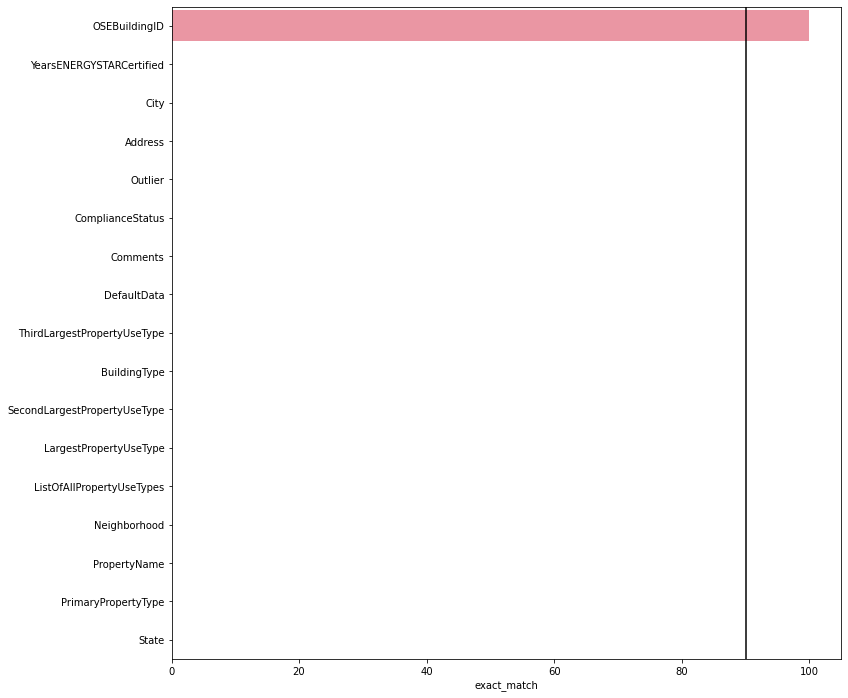

Columns to aggregate with 'last' rule (or first): 


Series([], Name: exact_match_score, dtype: float64)

In [329]:
categorial_df = dup_df.select_dtypes(exclude=[float,int])

df = pd.concat([dup_df[ident],categorial_df])
columns = categorial_df.columns.to_list()
columns.insert(0,ident)
df.columns = columns

#check 10% of duplicated ids

sample_size = round(0.1*len(dup_list)) 
sample_ids = random.choices(dup_list, k=sample_size) #choosing randomly duplicated ids 

sample = df[df[ident].isin(sample_ids)]

print(f"""checking {len(sample)} rows - {100*len(sample)/len(df):.2f}% of the {len(df)} rows to investigate""")  

threshold = 90

test_exactMatch = sample.iloc[0] == sample.iloc[1] 
test_exactMatch.replace(False,0).replace(True,1)

for i in [n for n in range(2,len(sample)) if n % 2 == 0] :
    #print(i,i+1)
    test_exactMatch = test_exactMatch + (sample.iloc[i] == sample.iloc[i+1]).replace(False,0).replace(True,1)
    
ratio_similarty = (100*test_exactMatch/(len(sample)/2)).sort_values(ascending=False)

ratio_similarty.name = "exact_match"

fig,ax = plt.subplots(figsize=(12,12))

sns.barplot(x=ratio_similarty,y=ratio_similarty.index,ax=ax)
plt.axvline(threshold,color="black")

plt.show()


print("Columns to aggregate with 'last' rule (or first): ")

keep_last = ratio_similarty.loc[lambda x : x > threshold]
keep_last = keep_last[1:] #excluding the id
keep_last.name = "exact_match_score"
keep_last

###### Analysis of the duplicates regarding quantitative metrics

'dropping 1 na rows'

,first,last,diffe
OSEBuildingID,,,
1,78.9,81.699997,3.0
3,96.6,96.000000,1.0
5,460.4,110.800003,350.0
8,120.1,114.800003,5.0
10,76.9,70.800003,6.0
...,...,...,...
49945,84.4,62.799999,22.0
49946,167.0,188.600006,22.0
49966,48.6,53.599998,5.0


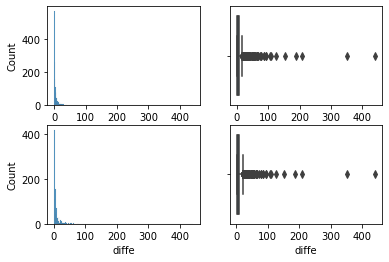

In [156]:
SiteEUI_t = df3.groupby(ident).agg(
    first = ('SiteEUI(kBtu/sf)',"first"),
    last = ('SiteEUI(kBtu/sf)',"last"),
    diffe = ('SiteEUI(kBtu/sf)',lambda x : x.max()-x.min()),
)

display(f"dropping {SiteEUI_t.diffe.isna().sum()} na rows")
SiteEUI_t.dropna(inplace=True)

SiteEUI_t.diffe = round(SiteEUI_t.diffe) 

display(SiteEUI_t[SiteEUI_t.diffe > 0])


fig,ax = plt.subplots(2,2)

sns.histplot(SiteEUI_t.diffe,ax=ax[0,0])
sns.boxplot(x=SiteEUI_t.diffe,ax=ax[0,1])

sns.histplot(SiteEUI_t[SiteEUI_t.diffe>1].diffe,ax=ax[1,0])
sns.boxplot(x=SiteEUI_t[SiteEUI_t.diffe>1].diffe,ax=ax[1,1])

plt.show()

In [157]:
pd.qcut(SiteEUI_t.diffe,q=5).value_counts()

(-0.001, 1.0]    569
(9.0, 441.0]     320
(4.0, 9.0]       279
(2.0, 4.0]       270
(1.0, 2.0]       259
Name: diffe, dtype: int64

checking 314 rows - 9.69% of the 3240 rows to investigate


data are not matching completly from a year to another with undetermined variability.

In [ ]:
treated = keep_last.index.to_list()
treated.append("DataYear") # we keep the last date date for the monent but the information will not relevant for the model

In [ ]:
df41 = df3.groupby(ident).agg({ 
                            "DataYear" : "last",
                            
                            'BuildingType':'last',
                            "CouncilDistrictCode":"last",
                            "Neighborhood" : "last",
                            "YearBuilt" : "last",
                            "NumberofFloors" : "last",
                            "PropertyGFATotal" : "last",
                            "ComplianceStatus" : "last",
                            "State" : "last"
                            
                           }
                          )
df41

###### remaining columns 

for numerical columns : agg with min, max, mean

for categorial data : keep last

In [ ]:
df42 = df3.drop(columns= treated).groupby(ident).agg(['first','last']).select_dtypes(exclude=[float,int])
df42

In [ ]:
colName = "Latitude"



newLat = toNumeric(df3,colName)


##### Method 2 : Rough duplicates selection

|Rules that could be applied | justification | risks |
|----------------------------|---------------|-------|
|keep last | considering the last data as more accurate||
|mean | considering that all measures are equally valid|if diff between measures is high, loosing opportunity to correct them and introduce noise in the model| 

In [62]:
df4 = df3.drop_duplicates(subset=["OSEBuildingID"],keep="last")
display(f"Shape after keeping last duplicates : {df4.shape}")
display(df4.sample(4))

'Shape after keeping last duplicates : (1698, 46)'

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
3394,69,2016,NonResidential,Hotel,Sequim Lodging Corp,1991200940,7,LAKE UNION,1997,1.0,...,False,NaN,Compliant,NaN,47.62025,-122.34314,226 Aurora Ave N,Seattle,WA,98109.0
6707,50212,2016,Nonresidential COS,Other,Conservatory Campus,2925049087,3,EAST,1912,1.0,...,False,NaN,Compliant,NaN,47.63228,-122.31574,1400 E Galer St,Seattle,WA,NaN
3456,185,2016,SPS-District K-12,K-12 School,Nathan Hale High,2826049152,5,NORTH,2011,1.0,...,False,NaN,Compliant,NaN,47.70763,-122.29453,17050 30th Ave. N.E.,Seattle,WA,98125.0
3691,494,2016,NonResidential,Medical Office,4225 Roosevelt 2ros4225,1145000200,4,NORTHEAST,1988,1.0,...,False,NaN,Compliant,NaN,47.65821,-122.31831,4225 Roosevelt Way NE,Seattle,WA,98105.0


# Custom functions 

In [206]:
def describeTable(df,*args) :

    """
    display a quick description about a given df, 
    optional arg l for figsize and padding 
    returns 
    - description df for each variable as per : dtype,fillrate,uvrate
    """
    
    
    newRow = {}
    dict_desc = {} #keys=["dataType","nbFilled","fillRate%","uniqueVal","uvRate%"])


    for col in df.columns : 

        dataType= df[col].dtype
        nbFilled = df[col].notna().sum()
        fillRate = 100*nbFilled / len(df[col])
        uniqueVal = df[col].nunique()
        uvRate = 100*uniqueVal /  len(df[col])

        newRow = {"dataType" : dataType,
                    "nbFilled":nbFilled,
                    "fillRate%":fillRate,
                    "uniqueVal":uniqueVal,
                    "uvRate%":uvRate
                    }  

        dict_desc[col] = newRow
    

    df_desc = pd.DataFrame(dict_desc)
    df_desc = pd.concat([df_desc,df.describe()],).transpose()
    df_desc = df_desc.sort_values("fillRate%",ascending=False) 
    
    
    
 ###################################################################
######################## figures ###################################
  
    if args : 
        l = args[0]
    else : 
        l = min(20,round(20*len(df)/30))

    fig , ax = plt.subplots(figsize=(l,l*0.7))

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plt.title(f"Table description",
             fontdict={
                'fontweight' : "bold" ,
                'verticalalignment': 'baseline',
                'horizontalalignment': 'center'},
            pad =10)

    # grid specification
    gs = fig.add_gridspec(1,3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])

    
    ########### AX1
    
    ax1.set_xlabel( "FillRate %")
    ax1.set_ylabel( "Variables")
    #ax1.tick_params(labelsize=l,width=l)

    sns.barplot(x="fillRate%", y=df_desc.index,data=df_desc,palette="flare",orient='h',ax=ax1)

    # truncate lables MUST BE DONE AFTER PLOT !!! DAMN IT !!!!!
    new_labels = [i.get_text()[:20]+"..." if len(i.get_text()) > 20 else i.get_text() 
              for i in ax1.yaxis.get_ticklabels()]
    
    ax1.set_yticklabels(new_labels)
    
    
  #valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 
  #'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 
  #'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 
  #'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 
  #'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_contains', 
  #'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 
  #'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 
  #'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 
  #'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 
  #'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 
  #'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 
  #'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 
  #'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']


  
    ax2.set_xlabel( "uvRate %")
    ax2.sharey = ax1
    ax2.get_yaxis().set_visible(False)

    #https://user-images.githubusercontent.com/15046660/93029833-e5341b00-f5e3-11ea-855b-3cd482acec81.png
    
    sns.barplot(x="uvRate%",
                y=df_desc.index,
                data=df_desc,
                palette="viridis",
                orient='h',
                ax=ax2)

    ax3.set_xlabel( "distributions")
    ax3.sharey = ax1
    ax3.get_yaxis().set_visible(False)

    #https://user-images.githubusercontent.com/15046660/93029833-e5341b00-f5e3-11ea-855b-3cd482acec81.png
    
    sns.boxplot(data=df, 
                orient="h",
                ax=ax3)
    
    

    plt.show()
    display ((HTML("<h3>Variables description</h3>")))
    display(df_desc)

    return df,df_desc

# Exploration 0

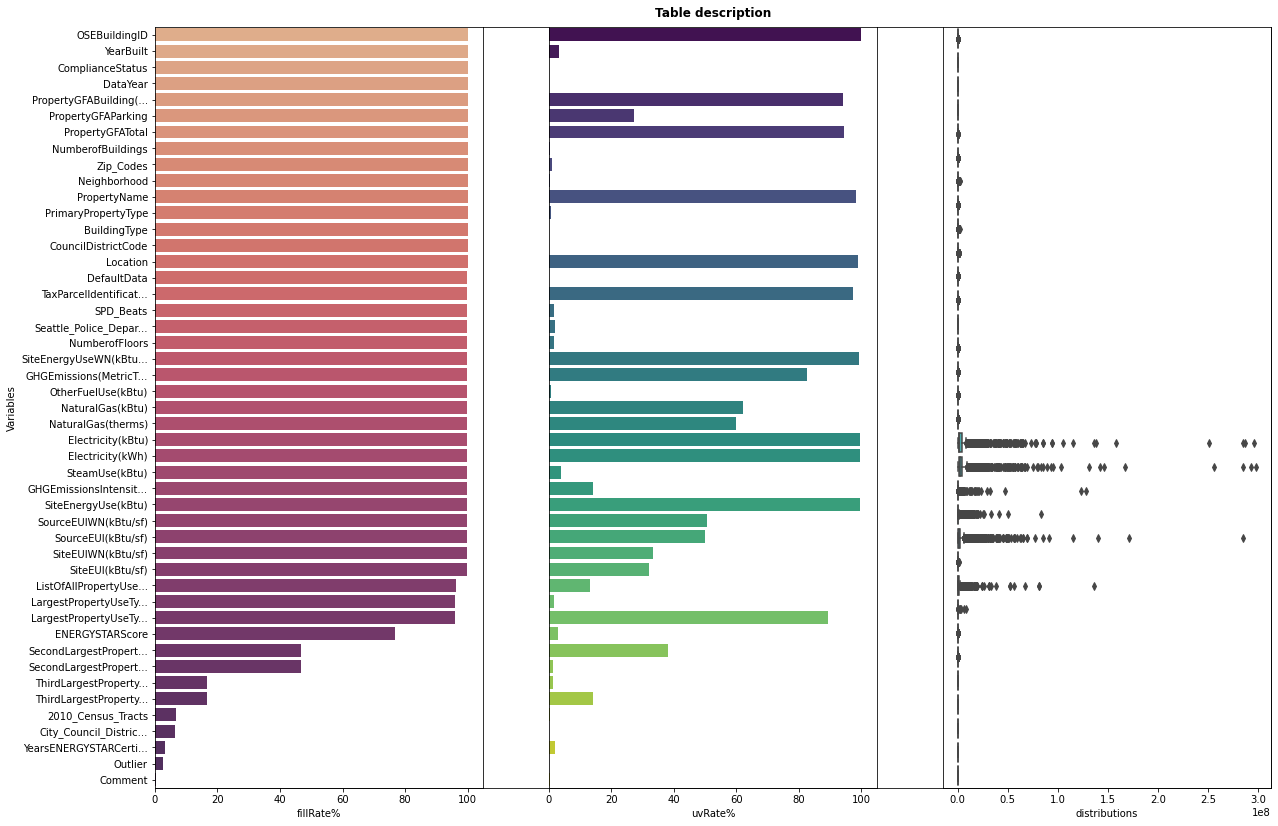

HTML(value='<h3>Variables description</h3>')

,dataType,nbFilled,fillRate%,uniqueVal,uvRate%,count,mean,std,min,25%,50%,75%,max
OSEBuildingID,int64,3340,100.0,3340,100.0,3340.0,20522.168263,11511.515874,1.0,19921.75,22977.0,25748.0,50059.0
YearBuilt,int64,3340,100.0,113,3.383234,3340.0,1967.62485,32.949847,1900.0,1947.0,1973.0,1996.0,2015.0
ComplianceStatus,object,3340,100.0,2,0.05988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DataYear,int64,3340,100.0,1,0.02994,3340.0,2015.0,0.0,2015.0,2015.0,2015.0,2015.0,2015.0
PropertyGFABuilding(s),int64,3340,100.0,3145,94.161677,3340.0,79718.860479,129231.444782,-50550.0,26683.0,41326.0,78726.0,2200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010_Census_Tracts,float64,224,6.706587,13,0.389222,224.0,123.0625,5.812128,116.0,117.0,123.0,125.5,135.0
City_Council_Districts,float64,213,6.377246,2,0.05988,213.0,1.347418,0.477272,1.0,1.0,1.0,2.0,2.0
YearsENERGYSTARCertified,object,110,3.293413,61,1.826347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlier,object,84,2.51497,2,0.05988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
df,df_desc = describeTable(df1)

In [158]:
describeTable(df2)

NameError: name 'describeTable' is not defined